**Import Modules**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [80]:
df= pd.read_csv('https://github.com/DataThinkers/Datasets/raw/main/DS/Restaurant_Reviews.tsv', sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [81]:
df.shape

(1000, 2)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [83]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [84]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [85]:
df['Character_count']= df['Review'].apply(len)

In [86]:
df.head()

,Review,Liked,Character_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [87]:
df['word_count']= df['Review'].apply(lambda x:len(str(x).split()))

In [88]:
df.head()

,Review,Liked,Character_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


**For checking out the sentences**

In [89]:
import nltk

In [90]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
df['Sentence_count']= df['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [92]:
df.head()

,Review,Liked,Character_count,word_count,Sentence_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [93]:
df[df['Liked'] == 1]['Character_count'].mean()


55.88

In [94]:
df[df['Liked'] == 0]['Character_count'].mean()

60.75

**Lets Clean the non alphabetical characters now**

In [95]:
import re

In [96]:
df['Review'][1]

'Crust is not good.'

In [97]:
review= re.sub('[^a-zA-Z]',' ', df['Review'][1])

In [98]:
review

'Crust is not good '

In [99]:
review= review.lower()

In [100]:
review = review.split()

In [101]:
review

['crust', 'is', 'not', 'good']

In [102]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

NB: Stopwords are most frequently used words, hence we need to remove it

In [104]:
review =[word for word in review if word not in set(all_stopwords)]

In [105]:
review

['crust', 'not', 'good']

Hence we need to be careful while choosing a stopword, becuase sometimes it may alter the entire statement

**Stemming: Text Normalization Technique**

In [106]:
from nltk.stem.porter import PorterStemmer

In [107]:
ps= PorterStemmer()

In [108]:
review = [ps.stem(word) for word in review]

In [109]:
review = " ".join(review)
review

'crust not good'

In [112]:
import re
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

corpus =[]
ps =PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [113]:
df['processed_text']=corpus

In [114]:
df.head()

,Review,Liked,Character_count,word_count,Sentence_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


**Using Worldcloud: Lets check most frequent Keywords**

In [125]:
from wordcloud import WordCloud

In [131]:
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="purple")

In [132]:
positive = wc.generate(df[df['Liked']==1]['processed_text'].str.cat(sep=" "))

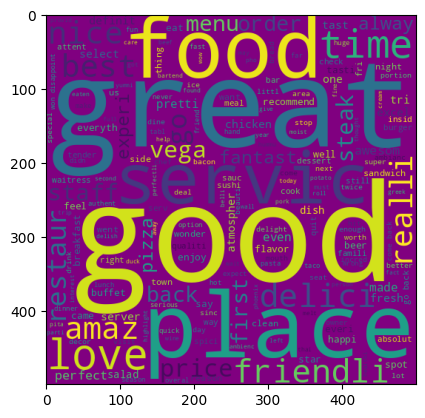

In [133]:
plt.imshow(positive);

In [135]:
negative = wc.generate(df[df['Liked']==0]['processed_text'].str.cat(sep=" "))

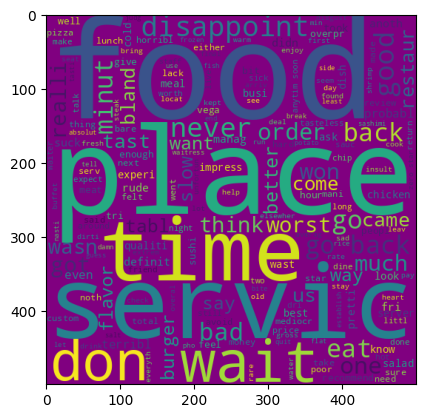

In [137]:
plt.imshow(negative);

In [138]:
df.head()

,Review,Liked,Character_count,word_count,Sentence_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


**Convert Reviews into Count from Text**

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

In [140]:
cv= CountVectorizer(max_features=1500)

**Define X & y**

In [151]:
X = cv.fit_transform(corpus).toarray()

In [152]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [153]:
X.shape

(1000, 1500)

In [154]:
y= df['Liked']

**Train Test Split**

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [161]:
from sklearn.naive_bayes import GaussianNB

In [162]:
nb =GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [163]:
accuracy_score(y_test,y_pred)

0.68

**Logistic Regression**

In [164]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.79

**Random Forest**

In [165]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.79

**Decision Tree**

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.735

**SVM**

In [167]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8

**Conclusion: Here we can use either SVC or Random Forest as a final model since both were giving accuracy of 80%**

**Save the model**

In [168]:
import joblib

In [169]:
joblib.dump(svc,'Restaurant_review_model')

['Restaurant_review_model']